# Lecture 17 – Visualizing Two Numerical Variables

## Data 6, Fall 2024

In [12]:
from datascience import *
import numpy as np
Table.interactive_plots()

Our first dataset today comes from [Basketball Reference](https://www.basketball-reference.com/leagues/NBA_2020_per_game.html). It contains per-game averages of statistics for players in the 2019-2020 NBA season.

Run the cell below to load it in, select the relevant columns, and do some data cleaning.

**Note:** Most of the interesting data comes from the "better" players in the league; we will only look at players who averaged at least 10 points per game in the season. This isn't perfect, since there were plenty of good players who averaged less than 10 points per game.

In [14]:
nba = Table.read_table('data/nba-2020.csv') \
           .select('Player', 'Pos', 'Tm', 'PTS', 'TRB', 'AST', '3PA', '3P%') \
           .where('3PA', are.not_equal_to(0))

def remove_code(name):
    return name[:name.index('\\')]

def get_court(pos):
    if 'G' in pos:
        return 'Guard'
    else:
        return 'Forward'

nba = nba.with_columns('Player', nba.apply(remove_code, 'Player'),
                       'Pos', nba.apply(get_court, 'Pos')) \
         .where('PTS', are.above(10))

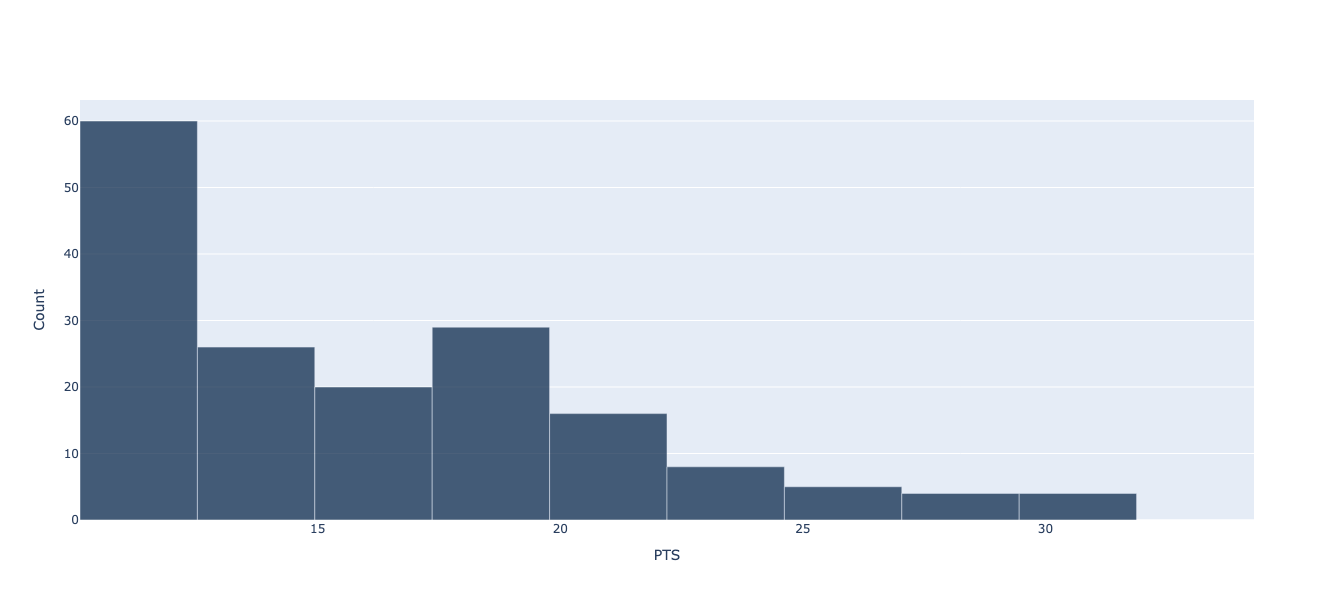

In [21]:
nba.hist("PTS", density=False, width=1000, height=600)

A description of each column:

- `'Player'`: name
- `'Pos'`: general position (either Forward or Guard)
- `'Tm'`: abbreviated team
- `'PTS'`: average number of points scored per game
- `'TRB'`: average number of rebounds per game (a player receives a rebound when they grab the ball after someone misses)
- `'AST'`: average number of assists per game (a player receives an assist when they pass the ball to someone who then scores)
- `'3PA'`: average number of three-point shots attempted per game (a three point shot is one from behind a certain line, which is between 22-24 feet from the basket)
- `'3P%'`: average proportion of three-point shots that go in

## Review – Bar Charts and Histograms

### Bar Charts

We can use the code below to generate average statistics for forwards and guards (different basketball positions).

In [22]:
stats_by_pos = nba.group('Pos', np.mean).select('Pos', 'PTS mean', 'TRB mean', 'AST mean')
stats_by_pos

Pos,PTS mean,TRB mean,AST mean
Forward,15.6297,6.68901,2.41099
Guard,16.7463,4.00244,4.45244


Now we can visualize this data by create a bar chart.

In [17]:
... # Create a bar chart of mean statistics by position

Ellipsis

### Histograms

Recall that histograms allow us to see the distribution (or frequencies) of values for a numerical variable. For example, we can visualize the distribution of points in the NBA.

In [9]:
... # Create a histogram showing the distribution of points

Ellipsis

We can also use the `group` argument in `.hist` to plot distributions of numerical variables by category (e.g. forwards vs. guards).

In [10]:
# Create a histogram showing the distribution of rebounds grouped by position
...

## Scatter Plots

Scatter plots allow us to visualize and investigate relationships between two numerical variables. To start out, we're going to create an example table with some fake data for our variables `x` and `y`/.

In [11]:
example_data = Table().with_columns(
    'x', np.array([1, 4, 4, 3, 6]),
    'y', np.array([-1, 2, 8, 0, 1])
)

example_data

x,y
1,-1
4,2
4,8
3,0
6,1


Instead of looking at the data in a table, we can put it in a scatter plot using `tbl.scatter()`.

In [ ]:
... # Create a scatter plot of y vs. x in `example_data`

### Example 1

Returning to our NBA data, we can explore the relationships between different statistics. For example, what is the relationship between the number of points scored by a player and the number of assists made by a player?

In [ ]:
... # Create a scatter plots showing points vs assists

If we use the optional argument `labels` we can see which player each point corresponds to (although it is hard to tell for players in the bottom left).

In [ ]:
nba.scatter('PTS', 'AST', labels='Player')

Observation: On average, as the number of points a player averages increases, the number of assists they average also increases.

### Quick Check 1

Fill in the blanks to create a scatter plot showing Three-Point Attempts (`"3PA"`) vs. Rebounds (`"TRB"`) for **forwards** in the `nba` table.

In [ ]:
nba.where(..., ...) \
          .scatter(..., ...,
           xaxis_title = 'Rebounds Per Game (TRB)',
           yaxis_title = 'Three-Point Attempts Per Game (3PA)',
           title = '3PA vs. TRB for Forwards')

Observation: on average, as the number of rebounds a player averages per game increases, the number of three point attempts they average per game decreases.

## More customization

We can customize our plots even further by specifying optional arguments. 

### Point Size (`s` and `sizes`)

In [ ]:
nba.scatter('PTS', '3P%', s = 40)

In [ ]:
nba.scatter('PTS', '3P%', s = 40, sizes = '3PA')

### Point Color by Grouping (`group`)

In [ ]:
nba.scatter('TRB', '3PA', group = 'Pos', s = 30)

Observation: Guards tend to have fewer rebounds and more three-point attempts than forwards, who tend to have more rebounds and fewer three-point attempts.

### Labels (`labels`)

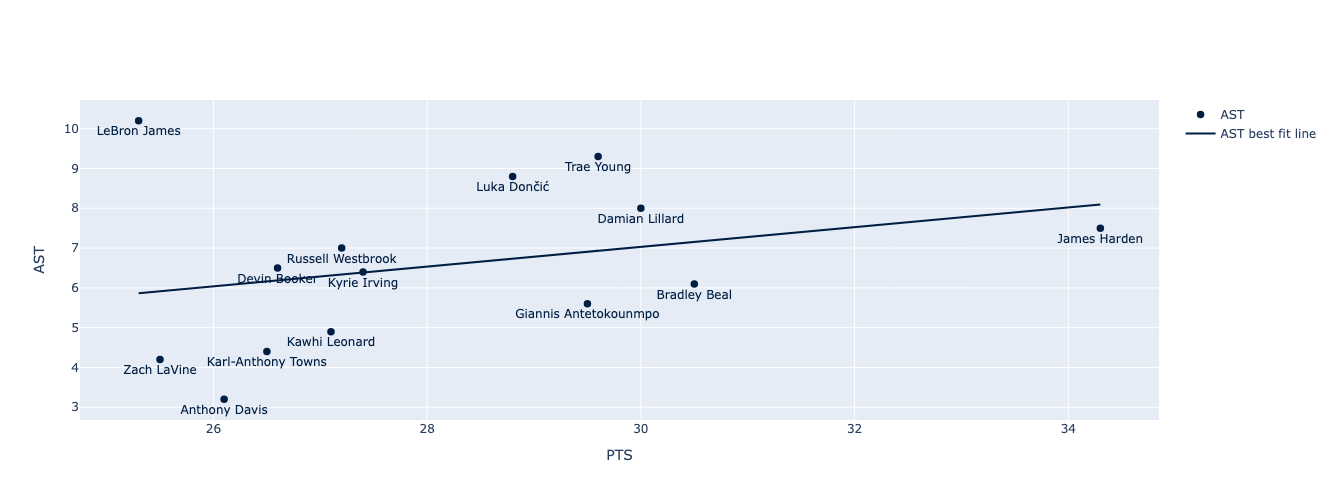

In [24]:
nba.where('PTS', are.above(25)) \
   .scatter('PTS', 'AST',
           labels = 'Player',
           s = 30,
           width = 500,
           height = 500, fit_line = True)

In [ ]:
nba.where('PTS', are.above(20)) \
   .scatter('PTS', 'AST',
           labels = 'Player',
           s = 30,
           sizes = '3PA',
           title = 'Players Averaging at least 20 PTS')

## Line Plots

Line plots are similar to scatter plots in that they visualize relationships between two numerical variables. However, one of the numerical variables has to have an order (like time or distance).

In [ ]:
nba_yearly = Table.read_table('data/nba-league-averages.csv') \
                  .select('Season', 'PTS', 'FGA', '3PA', '3P%', 'Pace')
nba_yearly = nba_yearly.with_columns('Season', np.arange(2021, 1979, -1))
nba_yearly

Our second dataset also comes from Basketball Reference. This dataset contains team-based average statistics for each year.

A little bit about our new dataset:
- `'Season'`: the second calendar year for each season (e.g. `2018` refers to the 2017-18 season)
- `'FGA'`: the average number of field goal attempts (shot attempts) per game
- `'Pace'`: the average number of times a team had possession of the ball per game

### Example 1

In [ ]:
... # Generate a line plot of `pace` by season

Observation: The league slowed down in the late 90s and early 2000s, but is speeding back up.

### Example 2

In [ ]:
# Generate a line plot of three point attempts by season
...

Observation: The three-point shot has rapidly increased in popularity over the past decade.

### Example 3

In [ ]:
nba_yearly.select('Season', 'FGA', '3PA')

In [ ]:
# Plot both field goal attempts (FGA) and three-point attempts (3PA) by season
...

Observation: Three point attempts have increase a lot since the 1980s, while the number of field goals (shots) attempted has stayed more or less the same.